In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Example dataset: Study Hours vs Pass/Fail
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])  # Study Hours
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])  # 0 = Fail, 1 = Pass



In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# Create and train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred=model.predict(X_test)
print("Predictions:",y_pred)

Predictions: [1 0]


In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
#Classification Report
from sklearn.metrics import classification_report

print("\nClassification Report :\n",classification_report(y_test,y_pred))


Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



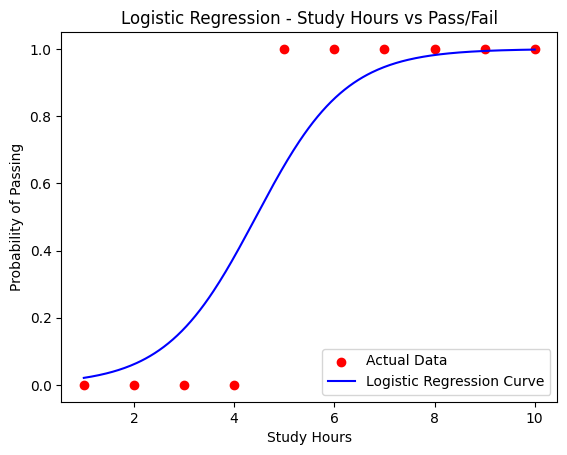

In [ ]:
# Plot
import matplotlib.pyplot as plt

# Generate a range of study hours for plotting the curve
X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)

# Predict probabilities for the generated range
y_prob = model.predict_proba(X_range)[:, 1]

plt.scatter(X, y, color="red", label="Actual Data")
plt.plot(X_range, y_prob, color="blue", label="Logistic Regression Curve")
plt.xlabel("Study Hours")
plt.ylabel("Probability of Passing")
plt.title("Logistic Regression - Study Hours vs Pass/Fail")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

print("\nConfusion Matrix :\n",confusion_matrix(y_test,y_pred))


Confusion Matrix :
 [[1 0]
 [0 1]]


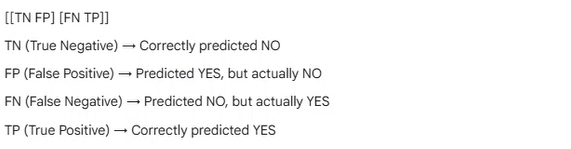

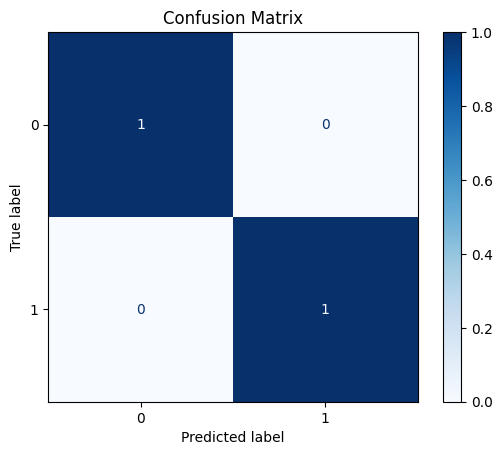

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    cmap="Blues",
    values_format="d"
)

plt.title("Confusion Matrix")
plt.show()


In [ ]:
#Heart Disease

In [ ]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  

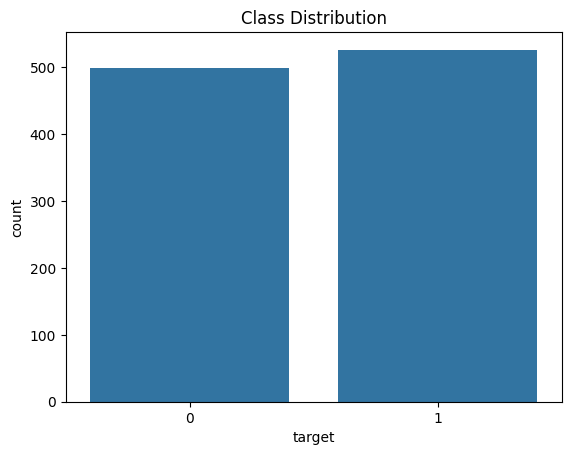

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())

# Check class distribution
sns.countplot(x=df['target'])
plt.title("Class Distribution")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define independent variables (X) and target variable (y)
X = df.drop("target", axis=1)
y = df["target"]

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize the features
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Create and train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
#Predictions
y_pred = model.predict(X_test)
print("Predictions:", y_pred)

Predictions: [1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1
 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0]


In [ ]:
#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7951219512195122


In [ ]:
#Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
4


Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



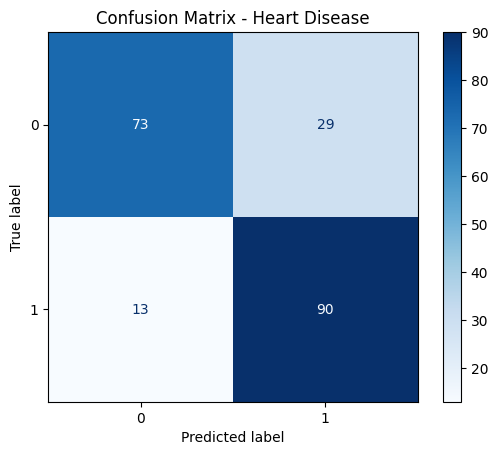

In [ ]:
#Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    cmap="Blues",
    values_format="d"
)

plt.title("Confusion Matrix - Heart Disease")
plt.show()

## TASK-3
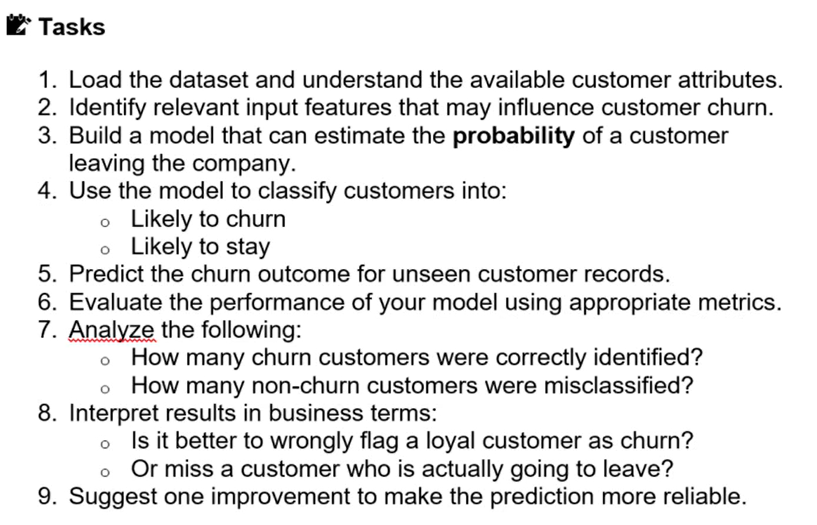

In [ ]:
#Q1
import numpy as np
import pandas as pd

# Load dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# View data
print(df.head())

# Dataset structure
print(df.info())

# Check missing values
print(df.isnull().sum())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [ ]:
#Q2
# Drop customerID (not useful)
df.drop("customerID", axis=1, inplace=True)

# Convert TotalCharges to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Fill missing values
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

# Convert target variable
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})


/tmp/ipython-input-1716064727.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


In [ ]:
#Q3
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Split features & target
X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create & train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
#Q4
# Predict probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Classify using threshold
y_pred = (y_prob >= 0.5).astype(int)

print("Predicted Classes:\n", y_pred[:10])


Predicted Classes:
 [1 0 0 1 0 0 0 0 0 0]


In [ ]:
#Q5
print("Predicted churn outcome for unseen customers:\n", y_pred[:10])


Predicted churn outcome for unseen customers:
 [1 0 0 1 0 0 0 0 0 0]


In [ ]:
#Q6
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Accuracy: 0.8211497515968772

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409


Confusion Matrix:
 [[933 103]
 [149 224]]


In [ ]:
#Q7
TN, FP, FN, TP = cm.ravel()

print("Correctly identified churn customers (TP):", TP)
print("Non-churn customers misclassified as churn (FP):", FP)


Correctly identified churn customers (TP): 224
Non-churn customers misclassified as churn (FP): 103


In [ ]:
#Q8: Business interpretation
print("Business Interpretation:")
print("It is better to wrongly flag a loyal customer as churn")
print("than to miss a customer who is actually going to leave.")

Business Interpretation:
It is better to wrongly flag a loyal customer as churn
than to miss a customer who is actually going to leave.


In [ ]:
#Q9
print("Improvement Suggestion:")
print("Use feature scaling and advanced models like Random Forest or XGBoost.")


Improvement Suggestion:
Use feature scaling and advanced models like Random Forest or XGBoost.
